# Reading GTFS data

GeNet ingests zipped or unzipped GTFS feeds. The following files are required in the unzipped folder, or inside the zip file:
- `calendar.txt`
- `stop_times.txt`
- `stops.txt`
- `trips.txt`
- `routes.txt`

When reading a GTFS feed, GeNet expects a date in `YYYYMMDD` format. It will raise an error if the selected date yields no services.

[Here](https://developers.google.com/transit/gtfs/reference) is the reference page for the schema of GTFS data.

GeNet does support extraction of services/routes/stops in the output `genet.Schedule` object based on a geographical area (Methods: `services_on_spatial_condition`, `routes_on_spatial_condition`, `stops_on_spatial_condition`, more information in notebook on using genet Network), but you might like to use [gtfs-lib](https://github.com/conveyal/gtfs-lib) prior to ingestion in GeNet.

The user assumes responsibility for the quality of their input GTFS feed. There are various validation tools that can 
be used with GTFS feeds before using with GeNet, see this page for a summary of [validation tools](https://gtfs.org/testing/).

In [1]:
from genet import read_gtfs

We initiate an empty `Schedule`

In [2]:
s = read_gtfs('../example_data/example_gtfs', '20190603')

2021-03-29 12:50:57,256 - Reading the calendar for GTFS
2021-03-29 12:50:57,260 - Reading GTFS data into usable format
2021-03-29 12:50:57,262 - Reading stop times
2021-03-29 12:50:57,267 - Reading trips
2021-03-29 12:50:57,274 - Reading stops
2021-03-29 12:50:57,279 - Reading routes


GTFS is assumed to be in `epsg:4326`, you need to project the Schedule to projection you require.

In [3]:
s.reproject('epsg:27700')

In [4]:
s.print()

Schedule:
Number of services: 2
Number of routes: 2
Number of stops: 4


/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


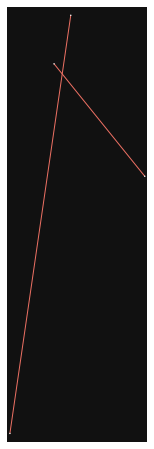

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d006390>)

In [5]:
s.plot()